In [1]:
# importing the necessary packages
import pdal
import json
import geopandas as gpd
import pandas as pd
from shapely.geometry import Polygon, Point, mapping
import numpy as np
from pyproj import Proj, transform
import folium
import laspy as lp
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [2]:
# importing packages and modules
import os, sys
sys.path.insert(0, '../scripts/')


In [3]:
# importing scripts
from package_test import test
object = test()

In [4]:
polygon2 = object.generate_polygon(object.coordinates, 4326)

In [5]:
# 3d map
object.show_on_map(polygon2, 20, polygon2)

In [6]:
coor = object.loop_EPSG_converter(object.coordinates)
print(coor)
polygon = object.generate_polygon(coor, 4326)

[[-10436887.43333523, 5148706.389047224], [-10436887.43333523, 5149217.145836504], [-10435905.484106943, 5149217.145836504], [-10435905.484106943, 5148706.389047224], [-10436887.43333523, 5148706.389047224]]


In [7]:
location = "../data/test_pipeline.json"
url = "https://s3-us-west-2.amazonaws.com/usgs-lidar-public"
region = "IA_FullState"
in_srs = 3857
out_srs = 4326

request = object.modify_pipe_json(location, url, region, in_srs, out_srs, polygon)

{'pipeline': [{'polygon': 'POLYGON ((-10436887.43333523 5148706.389047224, -10436887.43333523 5149217.145836504, -10435905.484106943 5149217.145836504, -10435905.484106943 5148706.389047224, -10436887.43333523 5148706.389047224))', 'filename': 'https://s3-us-west-2.amazonaws.com/usgs-lidar-public/IA_FullState/ept.json', 'type': 'readers.ept', 'tag': 'readdata'}, {'type': 'filters.range', 'limits': 'Classification![7:7]', 'tag': 'no_noise'}, {'in_srs': 'EPSG:3857', 'out_srs': 'EPSG:4326', 'tag': 'reprojectUTM', 'type': 'filters.reprojection'}, {'filename': 'iowa.csv', 'tag': 'writerscsv', 'type': 'writers.text'}, {'filename': 'iowa.las', 'tag': 'writersply', 'type': 'writers.las'}]}


In [8]:
pipe = pdal.Pipeline(json.dumps(request))

In [9]:
pipe.execute()

401577

In [10]:
df = object.generate_geo_df(pipe, 4326) 
df.head(20)

,elevation,geometry
0,317.59,POINT (-93.74864 41.92142)
1,317.42,POINT (-93.74863 41.92142)
2,317.27,POINT (-93.74862 41.92142)
3,317.28,POINT (-93.74865 41.92142)
4,317.25,POINT (-93.74867 41.92142)
5,317.30,POINT (-93.74868 41.92143)
6,317.15,POINT (-93.74877 41.92143)
7,317.00,POINT (-93.74875 41.92143)
8,317.35,POINT (-93.74873 41.92142)
9,317.19,POINT (-93.74872 41.92142)


Text(82.5, 0.5, 'Latitude')

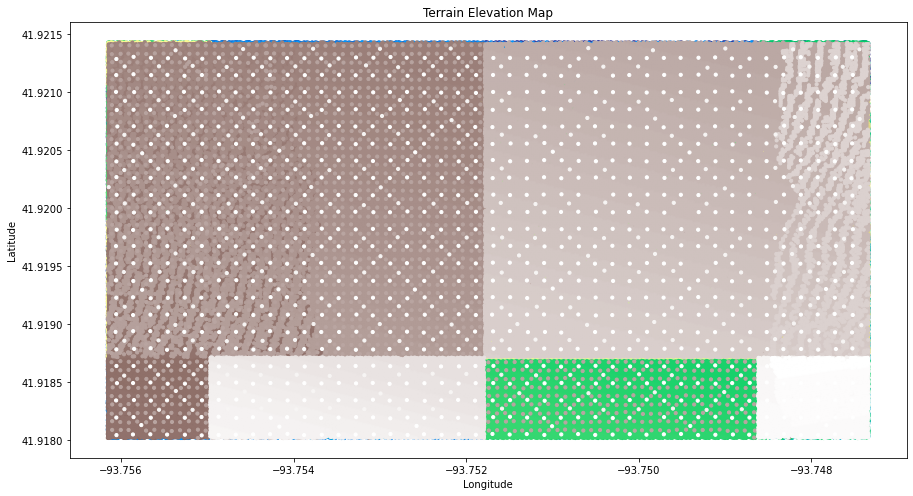

In [11]:
df.plot(c='elevation', scheme="quantiles", cmap='terrain', legend=True,
                                  markersize=10,
                                  figsize=(15, 20),
                                  missing_kwds={
                                    "color": "violet",
                                    "edgecolor": "red",
                                    "hatch": "///",
                                    "label": "Missing values"}
                                  )

plt.title('Terrain Elevation Map')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

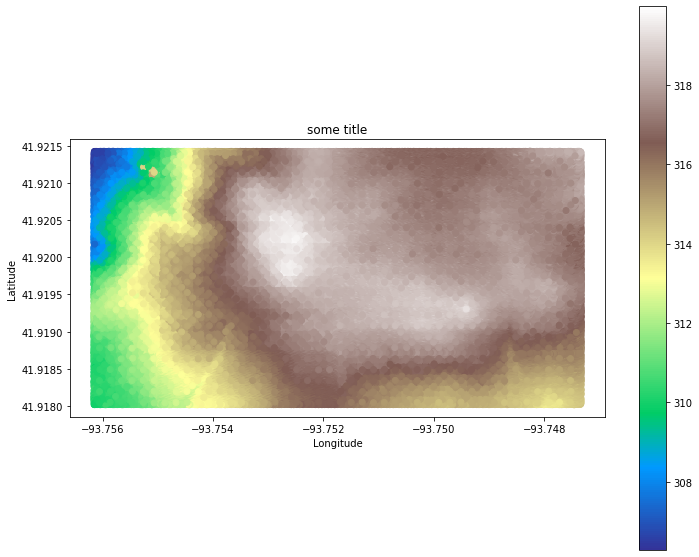

In [12]:
object.plot_heatmap(df, "some title")

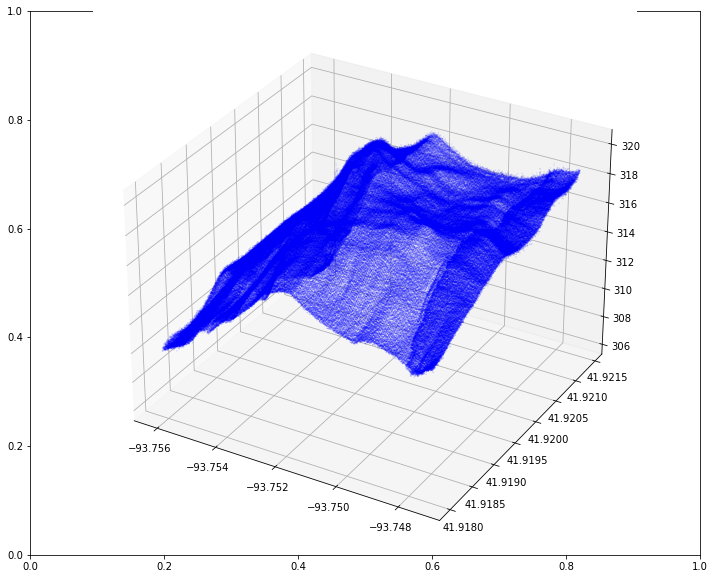

In [13]:
object.get_3D_visualzation(df)